ORCA 4500 HW7  
Yihang Ding   
yd2459@columbia.edu


1. Calculate the 90% confidence interval for the mean maternal age in two different ways:  
 (a) Using the knowledge we have of the distribution of the sample mean.  
 (b) Using the bootstrap method.

In [58]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
table=Table().read_table('baby.csv')
table

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [13]:
#get size of dataset
length=table.column(0).shape[0]
length

1174

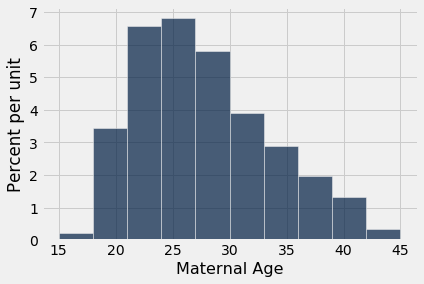

In [8]:
table.select('Maternal Age').hist()

1. sample mean approach

In [10]:
#compute mean & std
mat_mean=np.mean(table.column('Maternal Age'))
mat_std=np.std(table.column('Maternal Age'))
mat_mean,mat_std

(27.228279386712096, 5.815360404190897)

In [16]:
#with 90% confidence interval, Z value is 1.645
#X  ±  Z s√n
intr_lo = mat_mean - 1.645*mat_std/(length**0.5)
intr_hi = mat_mean + 1.645*mat_std/(length**0.5)
print('90% CI is:',intr_lo,'to',intr_hi)

90% CI is: 26.949083838651266 to 27.507474934772926


2. Bootstrap approach

In [29]:
table

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [30]:
def bootstrap_mean(sample, variableLabel, numBootstrap):
    age = sample.select(variableLabel)
    means = make_array()
    for i in np.arange(numBootstrap):
        bootstrap_sample = age.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
    return means

In [34]:
bstrap_means = bootstrap_mean(table, 'Maternal Age', 5000)
resampled_means = Table().with_column('Bootstrap Sample Mean', bstrap_means)

In [35]:
int_lo = percentile(5, bstrap_means)
int_hi = percentile(95, bstrap_means)
print('90% CI is:',int_lo,'to',int_hi)

90% CI is: 26.95144804088586 to 27.501703577512778


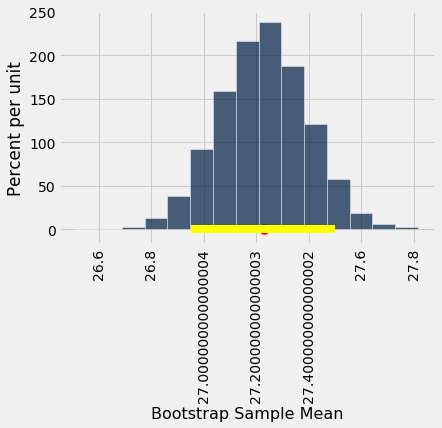

In [59]:
resampled_means.hist(bins=15)
plt.plot([int_lo, int_hi], [0, 0], color='yellow', lw=8)
plt.scatter(mat_mean, 0, color='red', s=100)

2. Calculate the 80% confidence interval for the proportion of mothers who smoked using the bootstrap method.

In [61]:
smoke=table.column('Maternal Smoker')
smoke[:10]

array([False, False,  True,  True, False, False, False, False,  True,
       False])

In [69]:
#convert to numeric
num_smoke=np.zeros(smoke.shape)
for i,item in enumerate(smoke):
    if item==True:
        num_smoke[i]=1
num_smoke[:10]

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0.])

In [76]:
smoke_mean=np.mean(num_smoke)
smoke_mean

0.3909710391822828

In [71]:
table=table.with_column('numeric smoke',num_smoke)
table

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,numeric smoke
120,284,27,62,100,False,0
113,282,33,64,135,False,0
128,279,28,64,115,True,1
108,282,23,67,125,True,1
136,286,25,62,93,False,0
138,244,33,62,178,False,0
132,245,23,65,140,False,0
120,289,25,62,125,False,0
143,299,30,66,136,True,1
140,351,27,68,120,False,0


In [74]:
bstrap_means = bootstrap_mean(table, 'numeric smoke', 5000)
resampled_means = Table().with_column('Bootstrap Sample Mean', bstrap_means)

In [75]:
int_lo = percentile(10, bstrap_means)
int_hi = percentile(90, bstrap_means)
print('80% CI is:',int_lo,'to',int_hi)

80% CI is: 0.3730834752981261 to 0.4097103918228279


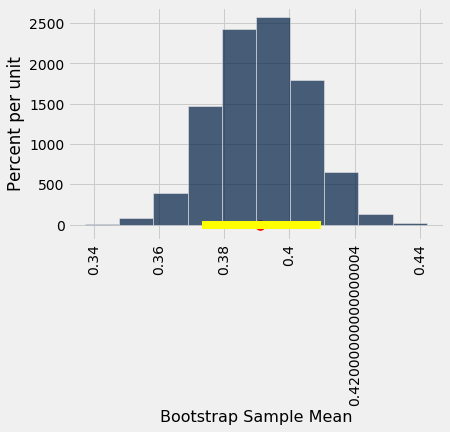

In [78]:
resampled_means.hist()
plt.plot([int_lo,int_hi],[0,0], color='yellow', lw=8)
plt.scatter(smoke_mean,0,color='red',s=100)